In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\SBIN.NS.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-04,334.100006,342.950012,331.850006,341.850006,341.850006,26789483.0
1,2019-12-05,343.000000,344.600006,335.149994,336.200012,336.200012,30429507.0
2,2019-12-06,336.700012,337.649994,318.000000,320.000000,320.000000,47027528.0
3,2019-12-09,318.950012,327.649994,314.750000,316.700012,316.700012,52435239.0
4,2019-12-10,317.200012,322.649994,312.250000,313.399994,313.399994,52155809.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [7]:
df['Date']=pd.to_datetime(df.Date)

In [10]:
train, test = df.loc[df['Date'] <= '2020-09-16'], df.loc[df['Date'] > '2020-09-16']
train.shape, test.shape

((197, 7), (55, 7))

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Date'], y=train.Close,
                    mode='lines+markers',
                    name='training_data'))

fig.add_trace(go.Scatter(x=test['Date'], y=test.Close,
                    mode='lines+markers',
                    name='testing_data'))

fig.update_layout(title='Plot of the SBI Stock price from December 2019 to December 2020')


In [43]:
# Let us see how the returns have been ove the year on a daily basis in percentage
train["Daily_Returns"] = train['Close'].pct_change(fill_method='ffill')*100
test["Daily_Returns"] = test['Close'].pct_change(fill_method='ffill')*100

In [44]:
train['Daily_Returns'] = train['Daily_Returns'].fillna(0)
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2019-12-04,334.100006,342.950012,331.850006,341.850006,341.850006,26789483.0,0.000000
1,2019-12-05,343.000000,344.600006,335.149994,336.200012,336.200012,30429507.0,-1.652770
2,2019-12-06,336.700012,337.649994,318.000000,320.000000,320.000000,47027528.0,-4.818564
3,2019-12-09,318.950012,327.649994,314.750000,316.700012,316.700012,52435239.0,-1.031246
4,2019-12-10,317.200012,322.649994,312.250000,313.399994,313.399994,52155809.0,-1.042001


In [67]:
train['Average_Daily_Return']=np.average(train.Daily_Returns)
test['Average_Daily_Return']=np.average(test.Daily_Returns)

In [75]:
# let us plot the Daily returns of both the train and test 
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Date'], y=train.Daily_Returns,
                    mode='lines+markers',
                    name='training_data'))

fig.add_trace(go.Scatter(x=test['Date'], y=test.Daily_Returns,
                    mode='lines+markers',
                    name='testing_data'))
fig.add_trace(go.Scatter(x=test['Date'], y=test.Average_Daily_Return,
                    mode='lines',
                    name='Average_return'))
fig.add_trace(go.Scatter(x=test['Date'], y=test.Average_Daily_Return,
                    mode='lines',
                    name='Average_Return'))



fig.update_layout(title='Daily returns of the SBI Stocks from December 2019 to December 2020')

In [63]:
# Let us now look at some indicators on the train data
fig1=go.Figure()
train['ma7'] = train['Close'].rolling(window=7).mean()
train['ma21'] = train['Close'].rolling(window=21).mean()
train['ma50'] = train['Close'].rolling(window=50).mean()
train['ma100'] = train['Close'].rolling(window=100).mean()
train['ma200'] = train['Close'].rolling(window=200).mean()
train['ma300'] = train['Close'].rolling(window=300).mean()

train['ma20'] = train['Close'].rolling(window=20).mean()
train['20sd'] = train['Close'].rolling(window=20).std()
train['upper_band'] = train['ma20'] + (train['20sd']*2)
train['lower_band'] = train['ma20'] - (train['20sd']*2)

fig1.add_trace(go.Scatter(x=train['Date'], y=train.ma7,
                    mode='markers',
                    name='Moving_Average_7_Days'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.ma21,
                    mode='markers',
                    name='Moving_Average_21_Days'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.ma50,
                    mode='markers',
                    name='Moving_Average_50_Days'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.lower_band,
                    mode='lines',
                    name='Upper_Band'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.upper_band,
                    mode='lines',
                    name='Lower_Band'))
# The actual stock price value
fig1.add_trace(go.Scatter(x=train['Date'], y=train.Close,
                    mode='lines+markers',
                    name='training_data'))

fig.update_layout(title='Dail')


In [76]:
# Fourier Transform
data_FT = train[['Date', 'Close']]

close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

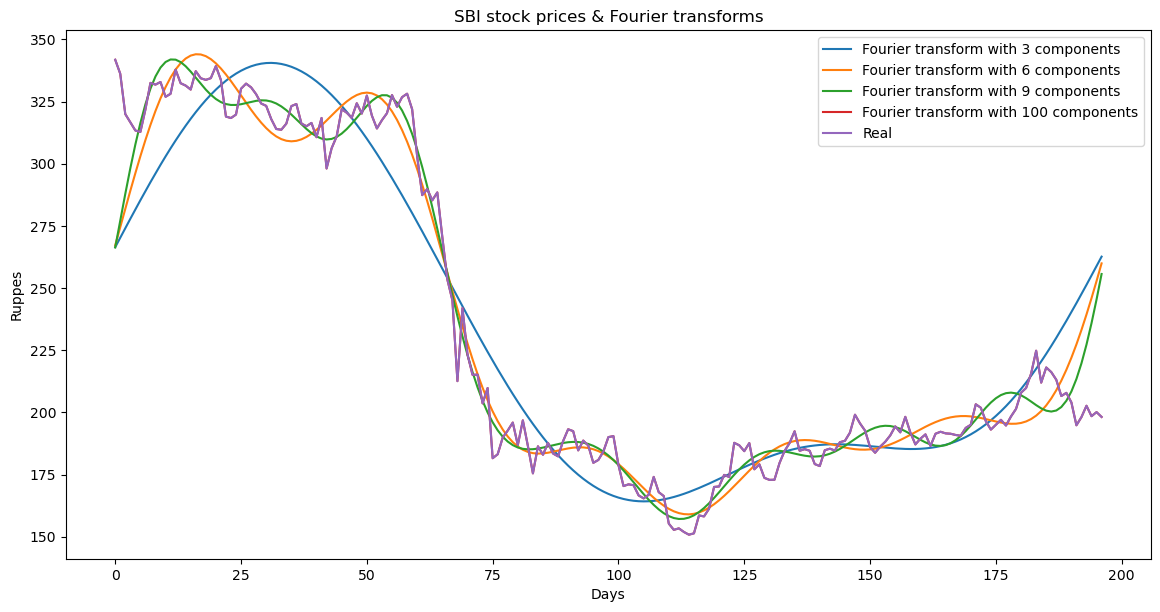

In [80]:
# This will help is in identifying the uptrend or downtrend to some extent
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('Ruppes')
plt.title('SBI stock prices & Fourier transforms')
plt.legend()
plt.show()